In [49]:
# The code was removed by Watson Studio for sharing.

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [50]:
print('size of train data',train.shape)
print('size of test data',test.shape)

size of train data (15120, 56)
size of test data (565892, 55)


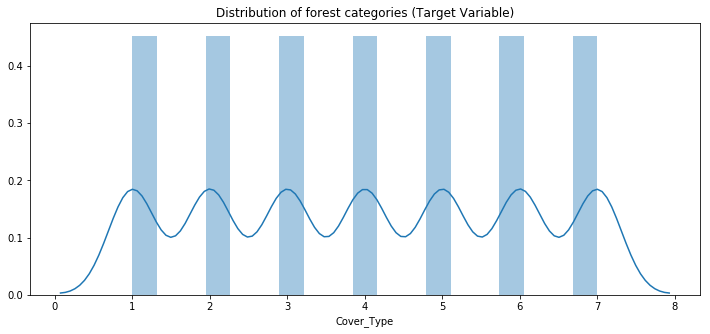

In [51]:
plt.figure(figsize=(12,5))
plt.title("Distribution of forest categories (Target Variable)")
ax = sns.distplot(train["Cover_Type"])

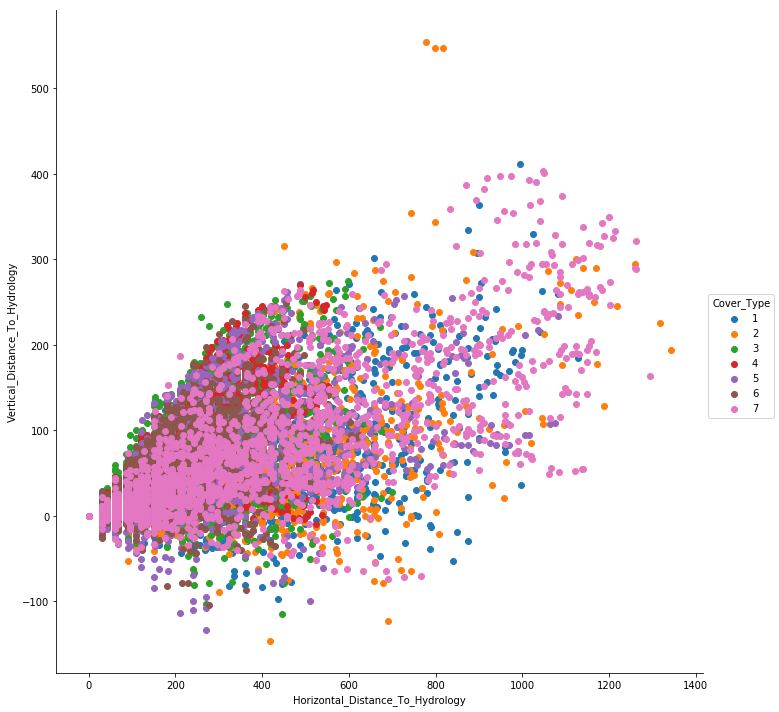

In [52]:
sns.FacetGrid(train, hue="Cover_Type", size=10).map(plt.scatter, "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology").add_legend()

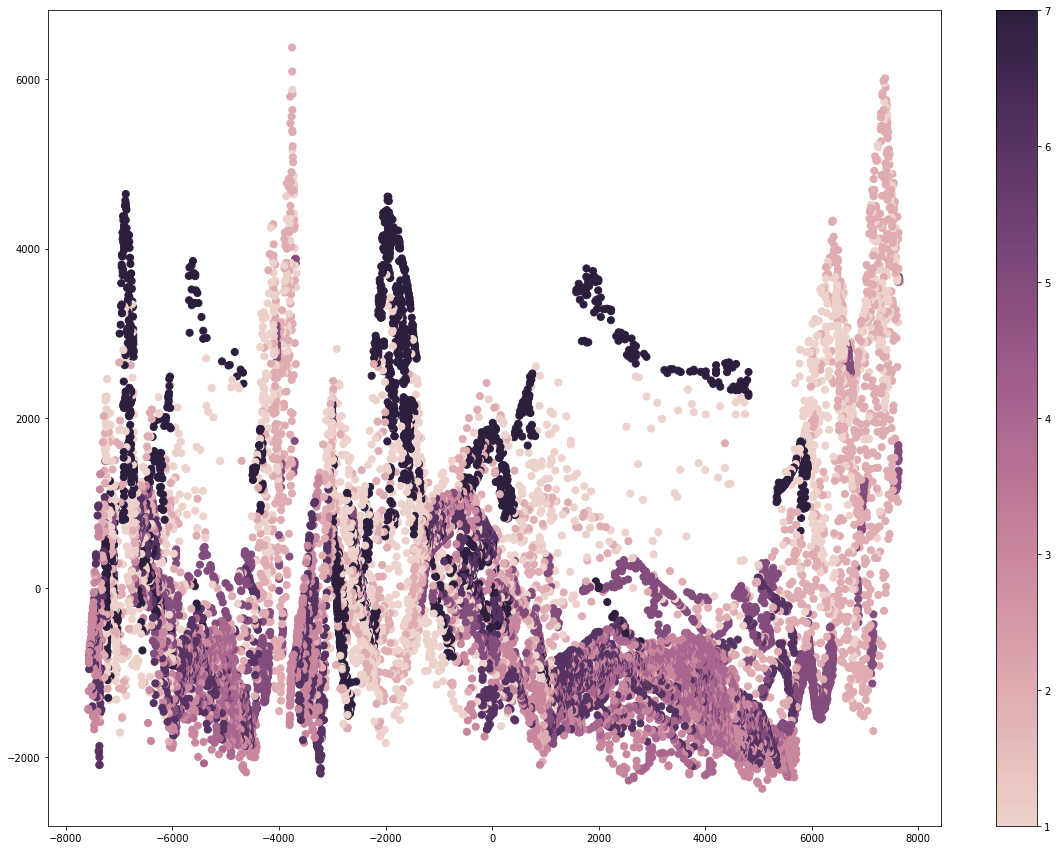

In [53]:
pca = PCA(n_components=3) # for simplicity i choose 3
pca_results = pca.fit_transform(train.drop(["Cover_Type"], axis=1))
cmap = sns.cubehelix_palette(as_cmap=True)
tp, ax = plt.subplots(figsize=(20,15))
temp = ax.scatter(pca_results[:,0], pca_results[:,1], c=train.Cover_Type, s=50, cmap=cmap)
tp.colorbar(temp)
plt.show()

In [54]:
#feature engineering

####################### Train data #############################################
train['HF1'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points']
train['HF2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HR1'] = abs(train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['HR2'] = abs(train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['FR1'] = abs(train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['FR2'] = abs(train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])
train['ele_vert'] = train.Elevation-train.Vertical_Distance_To_Hydrology

train['slope_hyd'] = (train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)**0.5
train.slope_hyd=train.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
train['Mean_Amenities']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology + train.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
train['Mean_Fire_Hyd']=(train.Horizontal_Distance_To_Fire_Points + train.Horizontal_Distance_To_Hydrology) / 2 

####################### Test data ##########################
###################
test['HF1'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points']
test['HF2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HR1'] = abs(test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['HR2'] = abs(test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['FR1'] = abs(test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['FR2'] = abs(test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])
test['ele_vert'] = test.Elevation-test.Vertical_Distance_To_Hydrology

test['slope_hyd'] = (test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)**0.5
test.slope_hyd=test.slope_hyd.map(lambda x: 0 if np.isinf(x) else x) # remove infinite value if any

#Mean distance to Amenities 
test['Mean_Amenities']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology + test.Horizontal_Distance_To_Roadways) / 3 
#Mean Distance to Fire and Water 
test['Mean_Fire_Hyd']=(test.Horizontal_Distance_To_Fire_Points + test.Horizontal_Distance_To_Hydrology) / 2

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [56]:
labels = np.array(train['Cover_Type'])
features = train.drop(['Cover_Type','Id'], axis=1)

#train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)


In [57]:
from sklearn import preprocessing

#scale data 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [58]:
#baseline model

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)
#predictions = y_pred

# evaluate predictions
accuracytrain = accuracy_score(y_train, y_pred)
print("Accuracy: %.2f%%" % (accuracytrain * 100.0))

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.09%
Accuracy: 77.74%


In [44]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

[Parallel(n_jobs=-1)]: Done  90 out of 100 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished


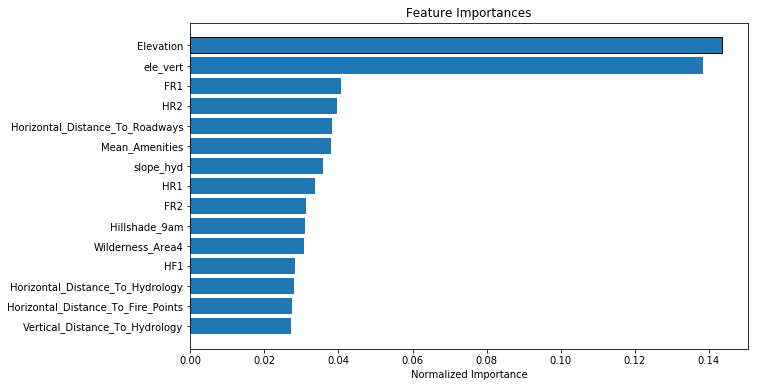

In [45]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest.fit(X_train, y_train)

# Feature names
features = list(features.columns)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

In [47]:
# Random search: random draws of hyperparameter combinations a set number of times
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
test_dmatrix = xgb.DMatrix(data = X_train, label = y_train)

param_grid = {'gamma': [1],
              "max_depth": [5],
              'learning_rate':np.arange(0.05, 1.05, 0.05) ,
             'n_estimators':[5,10],
             'subsample': np.arange(0.05, 1.05, 0.05)}

gbm = xgb.XGBClassifier(objective = 'binary:logistic')
grid_score2 = RandomizedSearchCV(estimator = gbm, param_distributions= param_grid, n_iter = 10)
grid_score2.fit(X_train,y_train)


KeyboardInterrupt: 

In [ ]:
print(grid_score2.best_params_)
print(grid_score2.best_score_)

In [59]:
from dsx_ml.ml import save

save(name='XGB Classifier',
     model=model,
     x_test=pd.DataFrame(X_test),
     y_test=pd.DataFrame(y_test),
     algorithm_type='Classification',
     source='Forest Cover EDA + Classifier.ipynb',
     description='This is a sample description for a xgb model')


ImportError: No module named 'dsx_ml'